In [76]:
import numpy as np
import importlib
import utils
import drawing
importlib.reload(utils)
importlib.reload(drawing)

# X_train, y_train, is_outlier_train, X_val, y_val, is_outlier_val, X_test, y_test, is_outlier_test = utils.get_training_data("saved_inputs_targets", zb_frac=5)

# score_dict = {
#     "teacher": y_test,
#     "cicada_v1": np.load("data/predictions/cicada-v1/x_test.npy").flatten(),
#     "cicada_v2": np.load("data/predictions/cicada-v2/x_test.npy").flatten(),
#     # "hgq":
# }



<module 'drawing' from '/Users/linogerlach/Projects/ML/ml4physics-paper-plots/drawing.py'>

In [130]:
import utils
importlib.reload(utils)
from utils import get_roc_dict

score_dict, roc_dict, auc_dict = {}, {}, {}

model_names = [
    "student_1Em4", "student_1Em5", "student_1Em6", "student_mixed",
    "student_qkeras", "teacher",
    "lgn-log", "lgn-lt2", "lgn-lt3", "clgn-lt6"
]

for model_name in model_names:
    score_dict[model_name] = {}
    auc_dict[model_name] = {}
    for process in ["ZeroBias", "TTtoHadronic", "TTtoSemiLeptonic", "QCD", "SingleNeutrino"]:
    # for process in ["ZeroBias", "TTtoHadronic", "TTtoSemiLeptonic"]:
        score_dict[model_name][process] = np.load(f"scores/{model_name}_{process}.npy").flatten()
    # a = get_roc_dict(score_dict[model_name], "ZeroBias", ["TTtoHadronic", "TTtoSemiLeptonic", "QCD", "SingleNeutrino"])
    # print(a)
    roc_dict[model_name], auc_dict[model_name] = utils.get_roc_dict(score_dict[model_name], "ZeroBias", ["TTtoHadronic", "TTtoSemiLeptonic", "QCD", "SingleNeutrino"])
    
    # roc_dict[model_name], a = utils.get_roc_dict(score_dict[model_name], "ZeroBias", ["TTtoHadronic", "TTtoSemiLeptonic", "QCD", "SingleNeutrino"])
    # print(a)



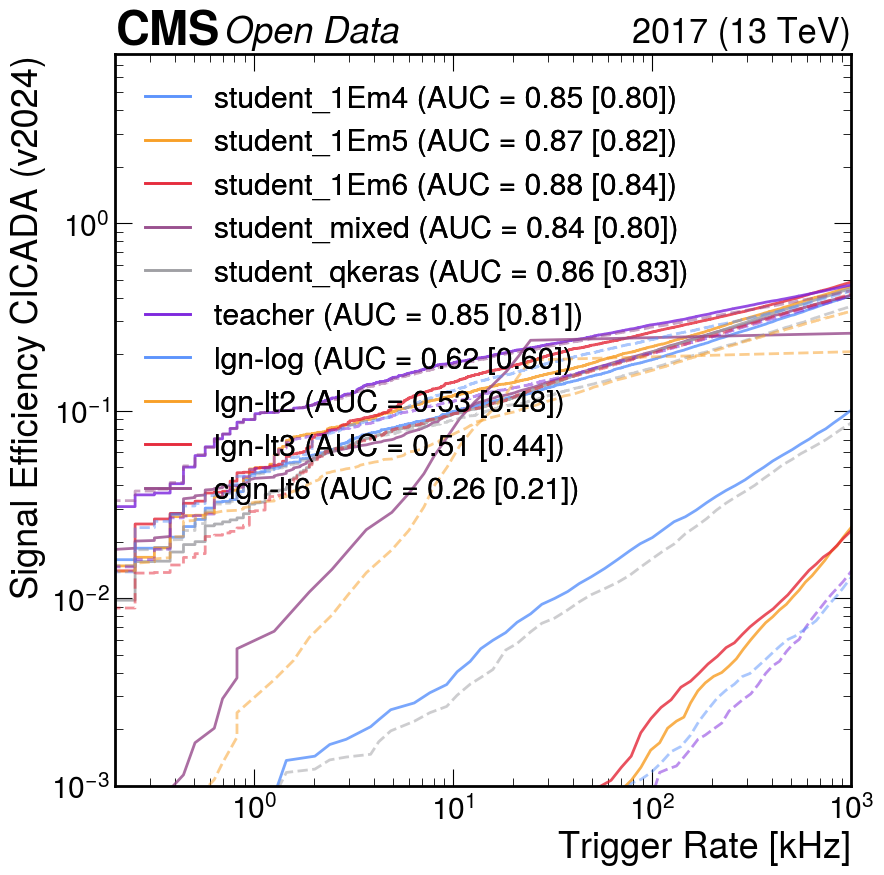

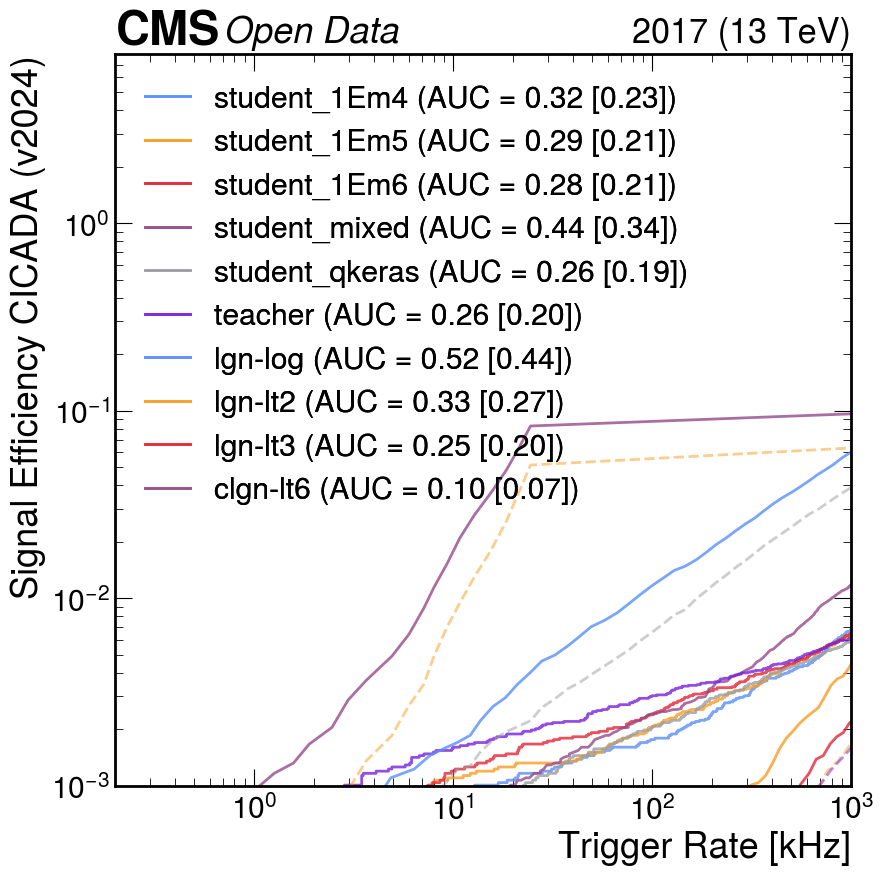

In [92]:
importlib.reload(drawing)
draw = drawing.Draw(interactive=True)

roc_dict_transpose = {}
for process in ["TTtoHadronic", "TTtoSemiLeptonic", "QCD", "SingleNeutrino"]:
    roc_dict_transpose[process] = {}
    # for model_name in ["student_1Em3", "student_1Em4", "student_1Em5", "student_1Em6", "student_mixed", "student_qkeras", "teacher"]:
    for model_name in model_names:
        roc_dict_transpose[process][model_name] = roc_dict[model_name][process]

draw.plot_roc_curves(
    roc_dict_transpose["TTtoHadronic"],
    roc_dict_alt=roc_dict_transpose["TTtoSemiLeptonic"],
    # alt_legend=("Considered Background", ("ZB 2024", "Simulated ZB")),
    yrange=(0.001, 8),
    xrange=(0.2, 1000),
    ylabel="Signal Efficiency CICADA (v2024)",
    name="roc-cicada-v2024",
)

draw.plot_roc_curves(
    roc_dict_transpose["QCD"],
    roc_dict_alt=roc_dict_transpose["SingleNeutrino"],
    # alt_legend=("Considered Background", ("ZB 2024", "Simulated ZB")),
    yrange=(0.001, 8),
    xrange=(0.2, 1000),
    ylabel="Signal Efficiency CICADA (v2024)",
    name="roc-cicada-v2024",
)


In [93]:
import scipy

# calculate EMD distances
emd_dict = {}
for model_name in model_names:
    emd_dict[model_name] = {}
    for process in ["ZeroBias", "TTtoHadronic", "TTtoSemiLeptonic", "QCD", "SingleNeutrino"]:
        emd = scipy.stats.wasserstein_distance(score_dict["teacher"][process], score_dict[model_name][process])
        emd_dict[model_name][process] = emd
        print(f"EMD {model_name} {process}: {emd:.4f}")
        

EMD student_1Em4 ZeroBias: 1.1933
EMD student_1Em4 TTtoHadronic: 5.4429
EMD student_1Em4 TTtoSemiLeptonic: 6.3151
EMD student_1Em4 QCD: 2.2770
EMD student_1Em4 SingleNeutrino: 1.1754
EMD student_1Em5 ZeroBias: 1.8957
EMD student_1Em5 TTtoHadronic: 7.5187
EMD student_1Em5 TTtoSemiLeptonic: 7.8244
EMD student_1Em5 QCD: 0.6541
EMD student_1Em5 SingleNeutrino: 0.2021
EMD student_1Em6 ZeroBias: 1.5546
EMD student_1Em6 TTtoHadronic: 1.8648
EMD student_1Em6 TTtoSemiLeptonic: 2.2194
EMD student_1Em6 QCD: 0.1041
EMD student_1Em6 SingleNeutrino: 0.1525
EMD student_mixed ZeroBias: 1.1972
EMD student_mixed TTtoHadronic: 7.2223
EMD student_mixed TTtoSemiLeptonic: 9.2859
EMD student_mixed QCD: 6.5433
EMD student_mixed SingleNeutrino: 4.6405
EMD student_qkeras ZeroBias: 1.2912
EMD student_qkeras TTtoHadronic: 4.8020
EMD student_qkeras TTtoSemiLeptonic: 4.5120
EMD student_qkeras QCD: 0.4145
EMD student_qkeras SingleNeutrino: 0.0722
EMD teacher ZeroBias: 0.0000
EMD teacher TTtoHadronic: 0.0000
EMD teac

In [80]:
for key, value in score_dict.items():
    for key2, value2 in value.items():
        print(f"{key} {key2}: {value2.shape}")
    # print(f"{key}: {value.mean():.4f} ± {value.std():.4f}")

student_1Em4 ZeroBias: (451636,)
student_1Em4 TTtoHadronic: (27200,)
student_1Em4 TTtoSemiLeptonic: (20444,)
student_1Em5 ZeroBias: (451636,)
student_1Em5 TTtoHadronic: (27200,)
student_1Em5 TTtoSemiLeptonic: (20444,)
student_1Em6 ZeroBias: (451636,)
student_1Em6 TTtoHadronic: (27200,)
student_1Em6 TTtoSemiLeptonic: (20444,)
student_mixed ZeroBias: (451636,)
student_mixed TTtoHadronic: (27200,)
student_mixed TTtoSemiLeptonic: (20444,)
student_qkeras ZeroBias: (451636,)
student_qkeras TTtoHadronic: (27200,)
student_qkeras TTtoSemiLeptonic: (20444,)
teacher ZeroBias: (451636,)
teacher TTtoHadronic: (27200,)
teacher TTtoSemiLeptonic: (20444,)
lgn-log ZeroBias: (451636,)
lgn-log TTtoHadronic: (27200,)
lgn-log TTtoSemiLeptonic: (20444,)
lgn-lt2 ZeroBias: (451636,)
lgn-lt2 TTtoHadronic: (27200,)
lgn-lt2 TTtoSemiLeptonic: (20444,)
lgn-lt3 ZeroBias: (451636,)
lgn-lt3 TTtoHadronic: (27200,)
lgn-lt3 TTtoSemiLeptonic: (20444,)
clgn-lt6 ZeroBias: (451636,)
clgn-lt6 TTtoHadronic: (27200,)
clgn-lt6 

In [153]:
import pandas as pd

# read from csv
df = pd.read_csv("synthesis_reports_Qkeras_HGQ.csv")
# print(df)

name_to_tag = {
    "student_1Em4": "1Em4",
    "student_1Em5": "1Em5",
    # "student_1Em6": "1Em6",
    "student_mixed": "mixed",
    "student_qkeras": "QKeras",
}

tag_to_name = {v: k for k, v in name_to_tag.items()}

ebop_dict = {}
for _, row in df.iterrows():
    if row.model_tag in name_to_tag.values():
        model_name = tag_to_name[row.model_tag]
        ebop = int(row["55*#DSP+#LUT"])
        ebop_dict[model_name] = ebop

# ebop_dict["lgn-log"] = 13973 
ebop_dict["lgn-lt2"] = 19977 
# ebop_dict["lgn-lt3"] = 20318
# ebop_dict["clgn-lt6"] = 44236

print(ebop_dict)

names = list(ebop_dict.keys())
ebops = list(ebop_dict.values())
zb_emds = [emd_dict[n]["ZeroBias"] for n in ebop_dict.keys()]
ttbar_had_emds = [emd_dict[n]["TTtoHadronic"] for n in ebop_dict.keys()]
ttbar_semilep_emds = [emd_dict[n]["TTtoSemiLeptonic"] for n in ebop_dict.keys()]

ttbar_had_aucs = [auc_dict[n]["TTtoHadronic"] for n in ebop_dict.keys()]
ttbar_semilep_aucs = [auc_dict[n]["TTtoSemiLeptonic"] for n in ebop_dict.keys()]
# qcd_emds = [emd_dict[n]["QCD"] for n in ebop_dict.keys()]
# singleneutrino_emds = [emd_dict[n]["SingleNeutrino"] for n in ebop_dict.keys()]




{'student_qkeras': 197782, 'student_1Em5': 112068, 'student_1Em4': 38166, 'student_mixed': 24947, 'lgn-lt2': 19977}


model_name: student_qkeras, ebop: 197782, auc: 0.8630935647340023
model_name: student_1Em5, ebop: 112068, auc: 0.8670768942701383
model_name: student_1Em4, ebop: 38166, auc: 0.8471936421714286
model_name: student_mixed, ebop: 24947, auc: 0.8391862708575047
model_name: lgn-lt2, ebop: 19977, auc: 0.5342283376517295


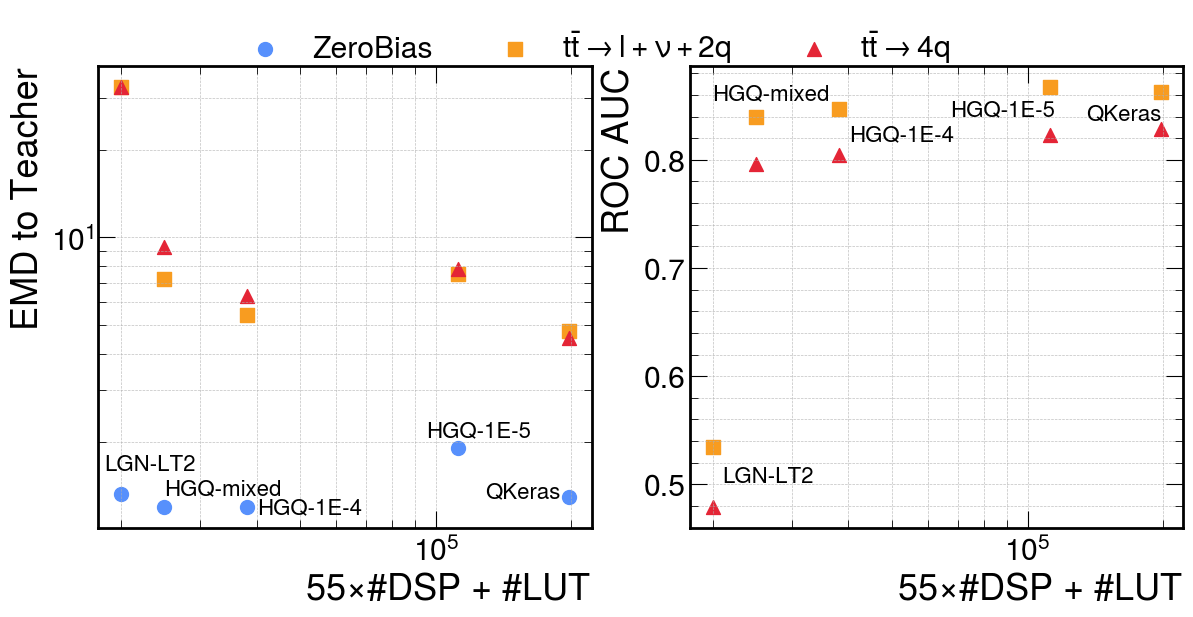

In [ ]:
import mplhep as hep
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, LogLocator


plt.style.use(hep.style.CMS)

# plot emd vs ebop and roc-auc vs ebop (subplots)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

name_to_plot = {
    "lgn-lt2": "LGN-LT2",
    "student_1Em4": "HGQ-1E-4",
    "student_1Em5": "HGQ-1E-5",
    "student_mixed": "HGQ-mixed",
    "student_qkeras": "QKeras",
}

# EMD vs EBOP
ax1.scatter(ebops, zb_emds, label="ZeroBias", marker="o", s=100)
ax1.scatter(ebops, ttbar_had_emds, label=r"$t\bar{t}\rightarrow l+\nu + 2q$", marker="s", s=100)
ax1.scatter(ebops, ttbar_semilep_emds, label=r"$t\bar{t}\rightarrow 4q$", marker="^", s=100)
ax1.set_xlabel(r"55$\times$#DSP + #LUT")
ax1.set_ylabel("EMD to Teacher")
offsets = {
    "lgn-lt2": (0.92, 1.2),
    "student_1Em4": (1.05, 0.95),
    "student_1Em5": (0.85, 1.1),
    "student_mixed": (1., 1.1),
    "student_qkeras": (0.65, 1.)
}
for i, model_name in enumerate(names):
    if model_name in ebop_dict:
        o1, o2 = offsets.get(model_name, (1.05, 1.))
        label = name_to_plot.get(model_name, model_name)
        ax1.text(ebop_dict[model_name]*o1, zb_emds[i]*o2, label, fontsize=16)


ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel(r"55$\times$#DSP + #LUT")
ax1.set_ylabel("EMD to Teacher")
ax1.grid(True, which="both", ls="--", lw=0.5)
# ax1.yaxis.set_major_locator(MaxNLocator(nbins=10))
ax1.yaxis.set_major_locator(LogLocator(base=10, numticks=10))

# ROC AUC vs EBOP
ax2.scatter([], [])
ax2.scatter(ebops, ttbar_had_aucs, label=r"$t\bar{t}\rightarrow l+\nu + 2q$", marker="s", s=100)
ax2.scatter(ebops, ttbar_semilep_aucs, label=r"$t\bar{t}\rightarrow 4q$", marker="^", s=100)

# t¯t → l + ν + 2q and t¯t → 4q,
offsets = {
    "lgn-lt2": (1.05, 0.94),
    "student_1Em4": (1.05, 0.965),
    "student_1Em5": (0.6, 0.97),
    "student_mixed": (0.8, 1.02),
    "student_qkeras": (0.68, 0.97)
}
for i, model_name in enumerate(names):
    if model_name in auc_dict:
        print(f"model_name: {model_name}, ebop: {ebop_dict[model_name]}, auc: {ttbar_had_aucs[i]}")
        o1, o2 = offsets.get(model_name, (1.05, 1.))
        label = name_to_plot.get(model_name, model_name)
        ax2.text(ebop_dict[model_name]*o1, ttbar_had_aucs[i]*o2, label, fontsize=16)

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
formatter = ScalarFormatter()
formatter.set_scientific(False)
ax2.yaxis.set_major_formatter(formatter)

ax2.set_xscale("log")
# ax2.set_yscale("log")
ax2.set_xlabel(r"55$\times$#DSP + #LUT")
ax2.set_ylabel("ROC AUC")
ax2.grid(True, which="both", ls="--", lw=0.5)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=5)

# plt.savefig("moneyplot.png")
plt.show()

